In [16]:
import numpy as np
import pylab as p
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_dynamics, plot_circle
from rpy2.robjects import FloatVector
from rpy2 import robjects
from rpy2.robjects.packages import importr
stats = importr('stats')
base = importr('base')

In [17]:
log_file = './results/simple_population_dynamics/exp_1/test_logs/3/log.txt'
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        #if len(line) == 12:
        #    prey_num.append(int(line[9]))
        #    predator_num.append(int(line[11]))
        #elif len(line) == 10:
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))
prey_num = np.array(prey_num[1000:])    
predator_num = np.array(predator_num[1000:])

In [11]:
# n = len(prey_num)
# dxdt = ((prey_num[2:n-1]-prey_num[:(n-3)])/2) - prey_num[1:(n-2)]*0.006
# dydt = ((predator_num[2:n-1]-predator_num[:(n-3)])/2) + predator_num[1:(n-2)]*0.003

# prey_num = prey_num.reshape((-1, 1))
# predator_num = predator_num.reshape((-1, 1))

# # input_x = np.concatenate([prey_num[1:(n-2)], prey_num[1:(n-2)]*predator_num[1:(n-2)]], axis=1)
# # input_y = np.concatenate([predator_num[1:(n-2)], prey_num[1:(n-2)]*predator_num[1:(n-2)]], axis=1)
# dydt = dydt.reshape(-1, 1)
# dxdt = dxdt.reshape(-1, 1)
# input_x = prey_num[1:(n-2)].reshape(-1, 1)
# input_y = predator_num[1:(n-2)].reshape(-1, 1)
# from sklearn import linear_model
# reg = linear_model.LinearRegression(fit_intercept=True)
# reg.fit(dxdt, input_x)

# reg2 = linear_model.LinearRegression(fit_intercept=True)
# reg2.fit(dydt, input_y)



In [12]:
prey_num

array([163, 164, 163, ...,  73,  73,  73])

In [19]:
n = len(prey_num)
dxdtx = (1/prey_num[1:n-2])*((prey_num[2:(n-1)]-prey_num[0:(n-3)])/2)
dydty = (1/predator_num[1:n-2])*((predator_num[2:n-1]-predator_num[0:(n-3)])/2)
# print(dxdtx)

# dxdtx = FloatVector(dxdtx)
# dydty = FloatVector(dydty)

# prey_num = FloatVector(prey_num[1:(n-2)])
# predator_num = FloatVector(predator_num[1:(n-2)])

# robjects.globalenv['dxdtx'] = dxdtx
# robjects.globalenv['prey_num'] = prey_num
# robjects.globalenv['dydty'] = dydty
# robjects.globalenv['predator_num'] = predator_num


# reg = stats.lm('dxdtx ~ prey_num')
# reg2 = stats.lm('dydty ~ predator_num')

prey_num = prey_num.reshape(-1, 1)
predator_num = predator_num.reshape(-1, 1)
dydty = dydty.reshape(-1, 1)
dxdtx = dxdtx.reshape(-1, 1)

from sklearn import linear_model
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1e-8)
reg.fit(dxdtx, prey_num[1:(n-2)])

reg2 = Ridge(alpha=1e-8)
reg2.fit(dydty, predator_num[1:(n-2)])



Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
reg.coef_

array([[223.23999706]])

In [15]:
# a = 1.953210e-05
# b = 8.194703e-03
# c = 4.465440e-03
# d = 5.341619e-03

print(a, b, c, d)

1.95321e-05 0.008194703 0.00446544 0.005341619


In [22]:
# Definition of parameters
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([a*X[0] -   b*X[0]*X[1],
                  -c*X[1] + d*X[0]*X[1]])


In [23]:
t = np.linspace(0, 10000, 10000)              # time
X0 = np.array([1000, 1000])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']         

'Integration successful.'

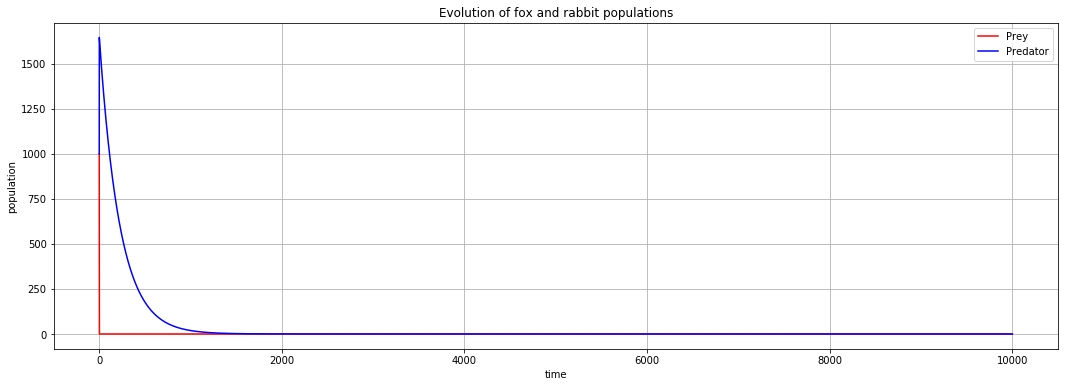

In [276]:
rabbits, foxes = X.T
f1 = p.figure(figsize=(18, 6))
p.plot(t, rabbits, 'r-', label='Prey')
p.plot(t, foxes  , 'b-', label='Predator')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

In [ ]:
plot_dynamics('./results/simple_population_dynamics/exp_2/test_logs/0/log.txt', 0, 60000)

In [ ]:
import csv 

In [ ]:
with open('./results/simple_population_dynamics/exp_2/test_logs/0/log.csv', mode='w') as log:
    log_writer = csv.writer(log, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(prey_num)):
        log_writer.writerow([prey_num[i][0], predator_num[i][0]])
    

In [ ]:
prey